In [1]:
import matplotlib.pyplot as plt
import numpy as np
import gsw
import pandas as pd
from scipy.io import netcdf

import seaborn as sns
sns.set(style='whitegrid',context='poster')
import glob
import multiprocessing
from model_plotting import plot_snapshot,plot_single_snapshot

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import gsw
import pandas as pd
from scipy.io import netcdf

In [3]:
pool = multiprocessing.Pool()
ndir = glob.glob('./output_2013asiri_05/full_*.cdf')
results = [pool.apply_async( plot_snapshot, args= (ndir[t].split('/')[2], ) ) for t in range(len(ndir))]
pool.close()
pool.join()

In [128]:
path = './output_2013asiri_05/'
zgrid = pd.read_csv(path+'zgrid.out', skipinitialspace=True, sep=' ', header=None)
zgrid = zgrid[1].values
time = cdffile.split('.')[0].split('_')[1]

In [154]:
zgrid = pd.read_csv(path+'zgrid.out', skipinitialspace=True, sep=' ', header=None)[1][2:50]
zgrid.shape

(48,)

In [5]:
def plot_single_snapshot_withrim(cdffile):
    #cdffile = 'full_17400.cdf'
    path = './output_2013asiri_05/'
    zgrid = pd.read_csv(path+'zgrid.out', skipinitialspace=True, sep=' ', header=None)[1][1:51]
    time = cdffile.split('.')[0].split('_')[1]
    
    swapaxesint = int( cdffile.split('_')[1].split('.')[0] )
    with netcdf.netcdf_file(path+cdffile,'r') as f:
        # print(f.variables)
        temptop = f.variables['temp'][:][32,:,:]
        tempface = f.variables['temp'][:][:, :, 1]
        saltop = f.variables['s'][:][32,:, :]
        salface = f.variables['s'][:][:, :, 1]
        rhotop = f.variables['rho'][:][32, :, :]
        rhoface = f.variables['rho'][:][:, :, 1]
        vortop = f.variables['vor'][:][32, :, :] / gsw.f(17)
        vorface = f.variables['vor'][:][:, :, 1] / gsw.f(17)
        x = f.variables['xc'][:]
        y = f.variables['yc'][:] 

        fig, ((ax1, ax3, ax5,ax7), (ax2, ax4, ax6,ax8)) = plt.subplots(2, 4, figsize=(30, 15))
        levels=[24,25,26,27,28]
        if  swapaxesint > 10000:
            v = np.linspace(17, 24.2, 101)
        else:
            v = np.linspace(17, 29.2, 101)
        ax1.contourf(y, x, temptop.T, v, cmap='viridis',extend='both')
        ax1.set(title='Temperature %s' % time, ylabel='x', xticks=[])
        h1 = ax2.contourf(y, zgrid, tempface, v, cmap='viridis', extend='both')
        CS = ax2.contour(y, zgrid, rhoface-1000,levels=levels)
        plt.clabel(CS, inline=1, fontsize=10,fmt='%2.0f')
        ax2.set(xlabel='y', ylabel='z', ylim=(-1000, 0))
        
        cbar_ax = fig.add_axes([0.36, 0.15, 0.01, 0.7])
        cbar = fig.colorbar(h1, cax=cbar_ax,ticks=np.arange(16,30,2))
        cbar.ax.set_xticklabels(np.arange(16,30,2))

        v = np.linspace(31.5, 35, 101)
        ax3.contourf(y, x, saltop.T, v, cmap='viridis',extend='both')
        ax3.set(title='Salinity %s' % time, yticks=[], xticks=[])
        h2 = ax4.contourf(y, zgrid, salface, v, cmap='viridis',extend='both')
        CS = ax4.contour(y, zgrid, rhoface-1000,levels=levels)
        plt.clabel(CS, inline=1, fontsize=10,fmt='%2.0f')
        ax4.set(xlabel='y', ylim=(-1000, 0), yticks=[])

        cbar_ax = fig.add_axes([0.7, 0.15, 0.01, 0.7])
        cbar = fig.colorbar(h2, cax=cbar_ax,ticks=np.arange(30,36,1))
        cbar.ax.set_xticklabels(np.arange(30,36,1))

        v = np.linspace(-10, 10, 11)
        ax5.contourf(y, x, vortop.T, v, cmap='RdBu_r', extend='both')
        ax5.set(title='Vorticity %s' % time, yticks=[], xticks=[])
        h3 = ax6.contourf(y, zgrid, vorface, v, cmap='RdBu_r', extend='both')
        CS = ax6.contour(y, zgrid, rhoface-1000,levels=levels)
        plt.clabel(CS, inline=1, fontsize=10,fmt='%2.0f')
        ax6.set(xlabel='y', ylim=(-1000, 0), yticks=[])

        cbar_ax = fig.add_axes([0.8, 0.15, 0.01, 0.7])
        cbar = fig.colorbar(h3, cax=cbar_ax,ticks=np.arange(-10,11,2))
        cbar.ax.set_xticklabels(np.arange(-4,5,2))
        
        v = np.linspace(20, 30, 11)
        ax7.contourf(y, x, rhotop.T-1000, v, cmap='RdBu_r', extend='both')
        ax7.set(title='Density %s' % time, yticks=[], xticks=[])
        h4 = ax8.contourf(y, zgrid, rhoface-1000, v, cmap='RdBu_r', extend='both')
        CS = ax8.contour(y, zgrid, rhoface-1000,levels=levels)
        plt.clabel(CS, inline=1, fontsize=10,fmt='%2.0f')
        ax8.set(xlabel='y', ylim=(-1000, 0), yticks=[])

        cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
        cbar = fig.colorbar(h4, cax=cbar_ax,ticks=np.arange(20,31,2))
        cbar.ax.set_xticklabels(np.arange(-4,5,2))

        plt.subplots_adjust(wspace=0.2, hspace=0.10)

        filename='update_s_t_vor_%s.png' % time
        plt.savefig(path+'/figures'+filename, bbox_inches='tight')
        print('plotted')
    return filename

['./output_2013asiri_05/full_00000.cdf', './output_2013asiri_05/full_00010.cdf', './output_2013asiri_05/full_00020.cdf', './output_2013asiri_05/full_00030.cdf', './output_2013asiri_05/full_00040.cdf', './output_2013asiri_05/full_00050.cdf', './output_2013asiri_05/full_00060.cdf', './output_2013asiri_05/full_00070.cdf', './output_2013asiri_05/full_00080.cdf', './output_2013asiri_05/full_00090.cdf', './output_2013asiri_05/full_00100.cdf', './output_2013asiri_05/full_00110.cdf', './output_2013asiri_05/full_00120.cdf']
plotted


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/io/netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


'update_s_t_vor_00120.png'

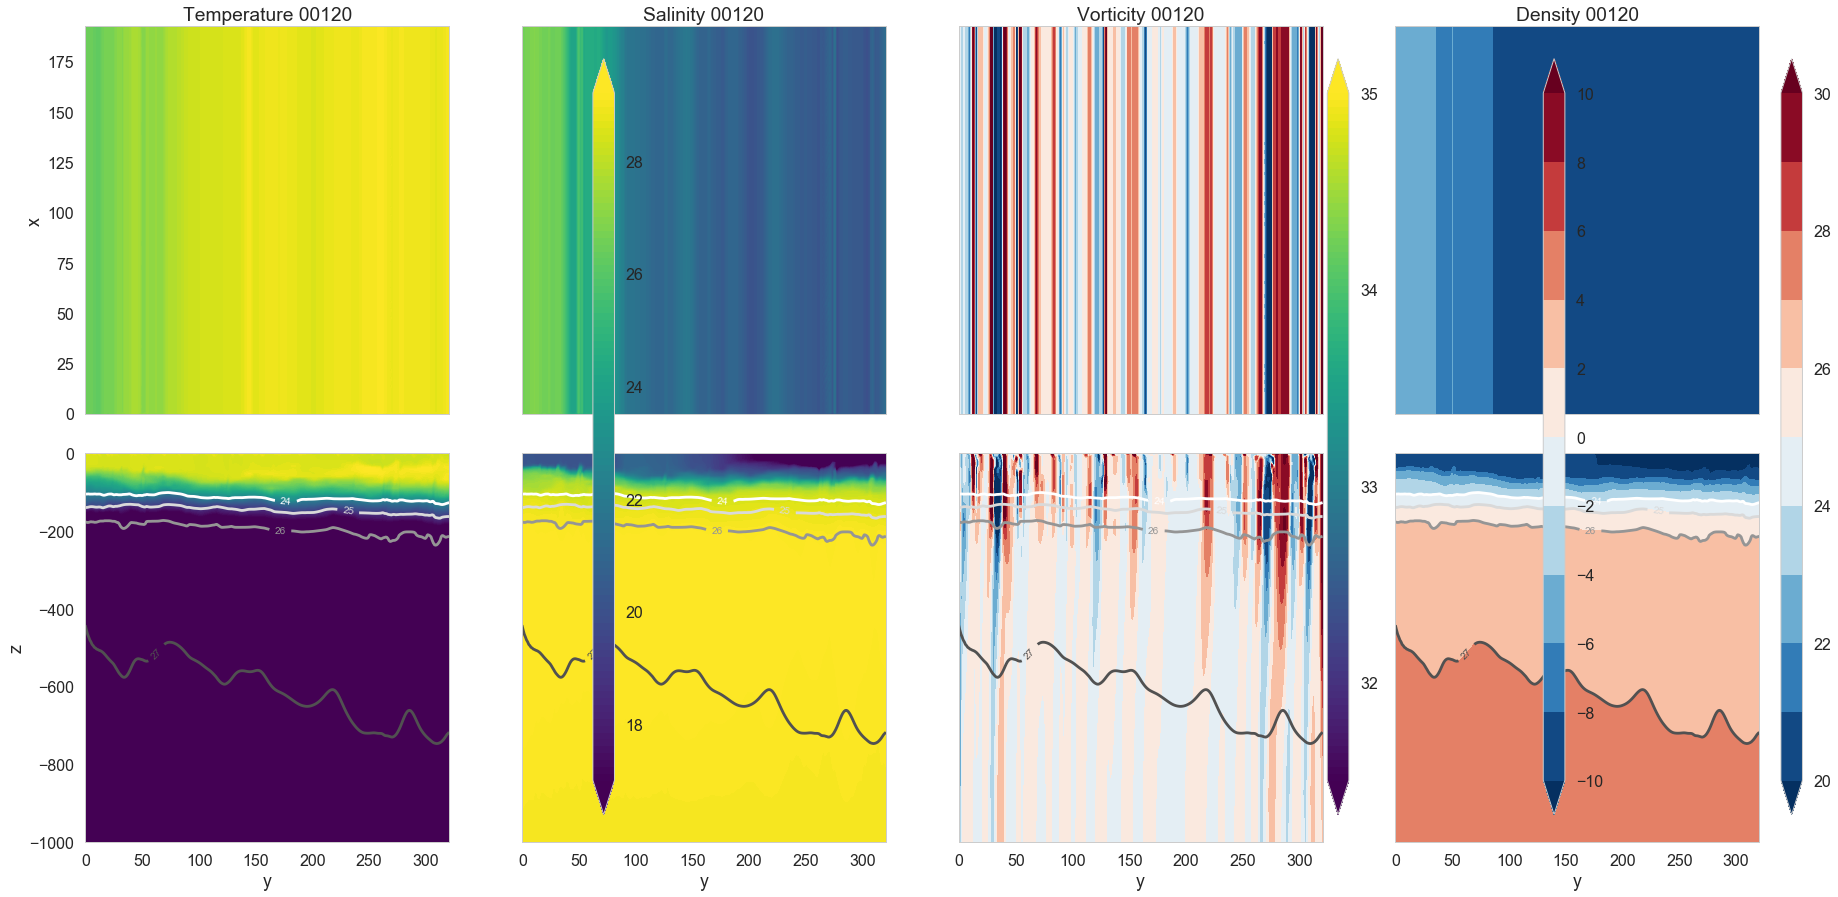

In [236]:
ndir = glob.glob('./output_2013asiri_05/full_*.cdf')
print(ndir)
plot_single_snapshot_withrim(ndir[-1].split('/')[2])

In [202]:
def plot_single_snapshot(cdffile):
    #cdffile = 'full_17400.cdf'
    path = './output_2013asiri_05/'
    zgrid = pd.read_csv(path+'zgrid.out', skipinitialspace=True, sep=' ', header=None)[1][2:50]
    time = cdffile.split('.')[0].split('_')[1]
    
    swapaxesint = int( cdffile.split('_')[1].split('.')[0] )
    with netcdf.netcdf_file(path+cdffile,'r') as f:
        # print(f.variables)
        temptop = f.variables['temp'][:][32, 1:-1, 1:-1]
        tempface = f.variables['temp'][:][1:-1, 1:-1, 1]
        saltop = f.variables['s'][:][32, 1:-1, 1:-1]
        salface = f.variables['s'][:][1:-1, 1:-1, 1]
        rhotop = f.variables['rho'][:][32, 1:-1, 1:-1]
        rhoface = f.variables['rho'][:][1:-1, 1:-1, 1]
        vortop = f.variables['vor'][:][32, 1:-1, 1:-1] / gsw.f(17)
        vorface = f.variables['vor'][:][1:-1, 1:-1, 1] / gsw.f(17)
        x = f.variables['xc'][1:-1]
        y = f.variables['yc'][1:-1] 

        fig, ((ax1, ax3, ax5), (ax2, ax4, ax6)) = plt.subplots(2, 3, figsize=(16, 10))
        levels=[24,25,26,27,28]
        if  swapaxesint > 10000:
            v = np.linspace(17, 24.2, 101)
        else:
            v = np.linspace(17, 29.2, 101)
        ax1.contourf(y, x, temptop.T, v, cmap='viridis',extend='both')
        ax1.set(title='Temperature %s' % time, ylabel='x', xticks=[])
        h1 = ax2.contourf(y, zgrid, tempface, v, cmap='viridis', extend='both')
        CS = ax2.contour(y, zgrid, rhoface-1000,levels=levels)
        plt.clabel(CS, inline=1, fontsize=10,fmt='%2.0f')
        ax2.set(xlabel='y', ylabel='z', ylim=(-1000, 0))
        
        cbar_ax = fig.add_axes([0.36, 0.15, 0.01, 0.7])
        cbar = fig.colorbar(h1, cax=cbar_ax,ticks=np.arange(16,30,2))
        cbar.ax.set_xticklabels(np.arange(16,30,2))

        v = np.linspace(31.5, 35, 101)
        ax3.contourf(y, x, saltop.T, v, cmap='viridis',extend='both')
        ax3.set(title='Salinity %s' % time, yticks=[], xticks=[])
        h2 = ax4.contourf(y, zgrid, salface, v, cmap='viridis',extend='both')
        CS = ax4.contour(y, zgrid, rhoface-1000,levels=levels)
        plt.clabel(CS, inline=1, fontsize=10,fmt='%2.0f')
        ax4.set(xlabel='y', ylim=(-1000, 0), yticks=[])

        cbar_ax = fig.add_axes([0.635, 0.15, 0.01, 0.7])
        cbar = fig.colorbar(h2, cax=cbar_ax,ticks=np.arange(30,36,1))
        cbar.ax.set_xticklabels(np.arange(30,36,1))

        v = np.linspace(-4, 4, 21)
        ax5.contourf(y, x, vortop.T, v, cmap='RdBu_r', extend='both')
        ax5.set(title='Vorticity %s' % time, yticks=[], xticks=[])
        h3 = ax6.contourf(y, zgrid, vorface, v, cmap='RdBu_r', extend='both')
        CS = ax6.contour(y, zgrid, rhoface-1000,levels=levels)
        plt.clabel(CS, inline=1, fontsize=10,fmt='%2.0f')
        ax6.set(xlabel='y', ylim=(-1000, 0), yticks=[])

        cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
        cbar = fig.colorbar(h3, cax=cbar_ax,ticks=np.arange(-4,5,2))
        cbar.ax.set_xticklabels(np.arange(-4,5,2))

        plt.subplots_adjust(wspace=0.2, hspace=0.10)

        filename='update_s_t_vor_%s.png' % time
        plt.savefig(path+'/figures'+filename, bbox_inches='tight')
        print('plotted')
    return filename

['./output_2013asiri_05/full_00000.cdf', './output_2013asiri_05/full_00010.cdf', './output_2013asiri_05/full_00020.cdf', './output_2013asiri_05/full_00030.cdf', './output_2013asiri_05/full_00040.cdf', './output_2013asiri_05/full_00050.cdf', './output_2013asiri_05/full_00060.cdf', './output_2013asiri_05/full_00070.cdf', './output_2013asiri_05/full_00080.cdf', './output_2013asiri_05/full_00090.cdf', './output_2013asiri_05/full_00100.cdf', './output_2013asiri_05/full_00110.cdf', './output_2013asiri_05/full_00120.cdf']
plotted


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/io/netcdf.py:317: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


'update_s_t_vor_00120.png'

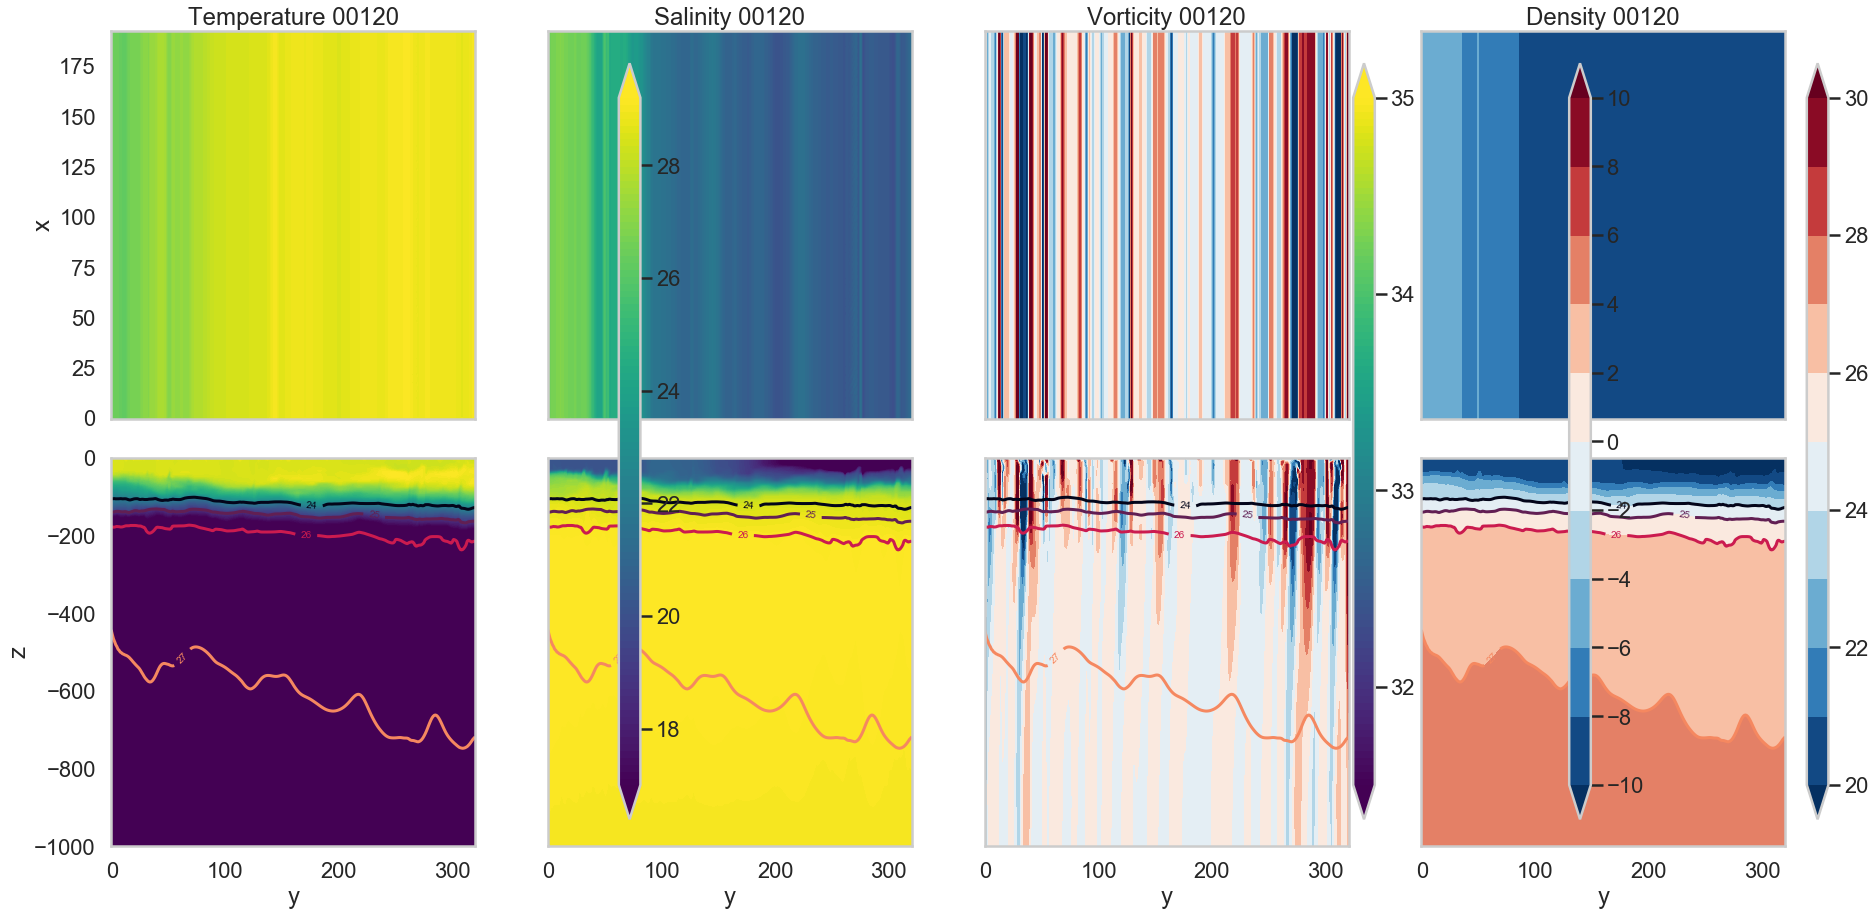

In [6]:
ndir = glob.glob('./output_2013asiri_05/full_*.cdf')
print(ndir)
plot_single_snapshot_withrim(ndir[-1].split('/')[2])